## BloomTech Data Science

---


# Logistic Regression
- scikit-learn pipelines
- train/validaiton/test split
- Baseline for classificaiton
- Logistic Regression




In [2]:
!pip install category_encoders==2.*

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [8]:
# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer # transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # transformer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I. Wrangle Data

In [9]:
def wrangle(filepath):
  df = pd.read_csv(filepath, index_col='PassengerId')
  df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
  df['Pclass'] = df['Pclass'].astype('object')
  return df


DATA = "https://raw.githubusercontent.com/bloominstituteoftechnology/DS-Unit-2-Linear-Models/master/data/titanic"
df = wrangle(f"{DATA}/train.csv")
X_test = wrangle(f"{DATA}/test.csv")

In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [11]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [7]:
df.shape, X_test.shape

((891, 8), (418, 7))

## II. Split Data

In [12]:
# Split Target Vector from our Feature Matrix
target = 'Survived'
y = df[target]
X = df.drop(columns=target)

In [13]:
# Split our data into a TRAINING set and a VALIDATION set (randomized)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

## III. Establish our baseline



In [14]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [17]:
# majority class
y_train.value_counts(normalize=True)

,proportion
Survived,
0,0.623596
1,0.376404


In [18]:
print('Baseline Accuracy Score:', y_train.value_counts(normalize=True).max())

Baseline Accuracy Score: 0.6235955056179775


## IV. Build Model

- Why would regular linear regression not work here?

Because linear regression works for continuous values, not discrete values. A linear regression model would fit a line at around 0.5 to be in between 0 and 1. It won't mean anything.

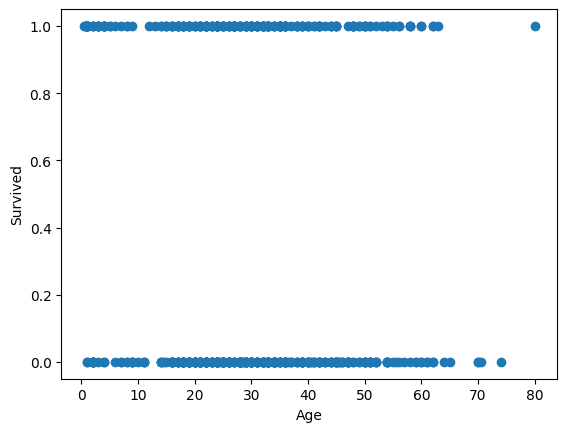

In [19]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived')

plt.show()

\begin{align}
p  (y=1) = \frac{1}{1+e^{-(b_0+b_1x)}}
\end{align}


What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [20]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## V. Check Metrics

In [21]:
# default metric will be accuracy for classficiation when using the .score method (based on model)!
# Remember for Linear Regression mdoel we get r2 value instead!

print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_val, y_val))

Training Accuracy: 0.8075842696629213
Validation Accuracy: 0.7988826815642458


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, model.predict(X_val)) # if training accuracy is much larger than validation accuracy, then model is overfit. If they are close, the model is not overfit, but may be underfit. We beat our baseline.

0.7988826815642458

In [23]:
# predict method returns class predictions (Survived = 1, Not Survived = 0)
y_pred = model.predict(X_test)

In [24]:
y_pred[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [25]:
# predict_proba method returns Probability estimates.# Default Classification Threshold is 0.5
y_pred_prob = model.predict_proba(X_test)

In [26]:
y_pred_prob[:20] # probability 0, probability 1

array([[0.88745441, 0.11254559],
       [0.60089032, 0.39910968],
       [0.83679421, 0.16320579],
       [0.89948313, 0.10051687],
       [0.4423606 , 0.5576394 ],
       [0.85759845, 0.14240155],
       [0.31965884, 0.68034116],
       [0.77943846, 0.22056154],
       [0.22096887, 0.77903113],
       [0.92695645, 0.07304355],
       [0.9063381 , 0.0936619 ],
       [0.7150286 , 0.2849714 ],
       [0.08694477, 0.91305523],
       [0.90548688, 0.09451312],
       [0.17417603, 0.82582397],
       [0.10797521, 0.89202479],
       [0.69153543, 0.30846457],
       [0.81987142, 0.18012858],
       [0.45010164, 0.54989836],
       [0.39143856, 0.60856144]])

In [27]:
## degree of certainity with which the model predicts the person survived (i.e 1) (for all our test samples)
# JUST GRAB THE LAST COLUMN VALUES
y_pred_prob[:20, -1]

array([0.11254559, 0.39910968, 0.16320579, 0.10051687, 0.5576394 ,
       0.14240155, 0.68034116, 0.22056154, 0.77903113, 0.07304355,
       0.0936619 , 0.2849714 , 0.91305523, 0.09451312, 0.82582397,
       0.89202479, 0.30846457, 0.18012858, 0.54989836, 0.60856144])